## Related Rates

When studying the behavior of a function, it is often the case that the argument of the function itself depends on another parameter $t$. For instance, the velocity of a car at any given time could depend on the forces acting on the car, which could be due to accelerating, braking, and wind resistance. That is, the velocity $v$ is a function of the the forces $f$: $v = v(f)$. But from experience, we know that these forces and thus the velocity of the car vary over time, such that the rate of change of the velocity over time $t$ is _related_ to the rate of change of the forces over time.

In symbols, we say that the velocity 

\begin{align*}
v(t) = v(f(t)). 
\end{align*}

To find how the velocity varies over time, we can differentiate using the chain rule to find the rate of change of the velocity:

\begin{align*}
v'(t) = v'(f(t)) \times f'(t)
\end{align*}

For instance, if $v(f) = 3f^2-2f+1$, and $f(t) = -10t^3+t$, then

\begin{align*}
f'(t) &= -30t^2+1 \\ 
\text{ and }  
v'(f) &= 6f-2 \\
&= 6(-10t^3+t) - 2 \\ 
&= -60t^3+6t-2
\end{align*}

so that the rate of change of the velocity as a function of time is 

\begin{align*} \tag{1}
v'(t) &= (6f-2)\times (-30t^2+1) 
\end{align*}

or 

\begin{align*}\tag{2}
v'(t) = (-60t^3 + 6t -2) \times (-30t^2 + 1)
\end{align*}


In [5]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import ipywidgets as wd
import matplotlib.animation as animation
%matplotlib widget

### Some examples 

Let us consider an example. Imagine that we are lying on the $y$ axis on the coordinate $(0, 3)$ and we want to find how the distance between us and the parabola $f(x) = y = \frac{1}{4}x^2 - 2$ varies as a function of the coordinates of the parabola $(x, f(x))$, as seen on the graph below. 

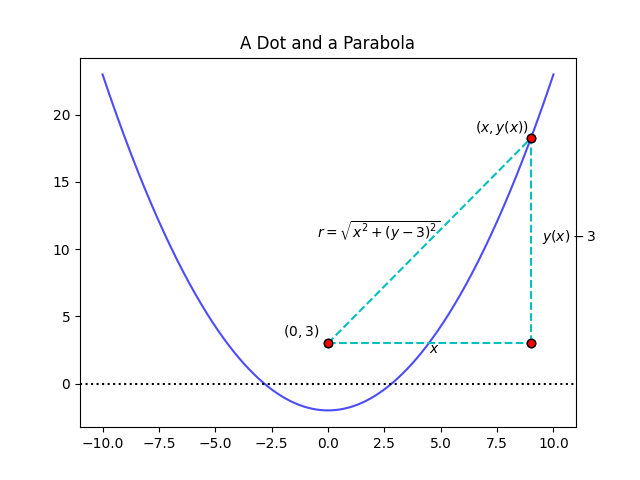

In [84]:
def parabola(x):
    return (1/4)*x*x -2

x = np.linspace(-10, 10, 10000)
x0 = 0
y0 = 3
x1 = 9
y1 = parabola(x1)
xmid = (x1+x0)/2
ymid = (y1+y0)/2
        
fig, ax = plt.subplots()

ax.plot(x, parabola(x), color='b', alpha=0.7)
ax.plot([x0, x1], [y0, y1], color='c', marker='o', markerfacecolor='red', markeredgecolor='black', ls="--")
ax.plot([x0, x1], [y0, y0], color='c', marker='o', markerfacecolor='red', markeredgecolor='black', ls="--")
ax.plot([x1, x1], [y0, y1], color='c', marker='o', markerfacecolor='red', markeredgecolor='black', ls="--")


#ax.grid()
ax.text(xmid-5, ymid+0.2, '$r = \\sqrt{x^2+(y-3)^2}$')
ax.text(xmid, y0-0.7, '$x$')
ax.text(x1+0.5, ymid, '$y(x)-3$')
ax.text(x0-2, y0+0.5, '$(0, 3)$')
ax.text(x1-2.5, y1+0.5, '$(x, y(x))$')
ax.axhline(0, ls=':', color='k')
ax.set_title("A Dot and a Parabola")
plt.show()

From the graph above, it follows that $r^2 = x^2 + (y-3)^2$. If we differentiate with respect to $x$, we can determine how the rate of change of the distance $r$ is related to the rate of change of the function $y(x) = \frac{1}{4}x^2 -2$: 

\begin{align*}
2rr'(x) &= 2x + 2(y-3)y'(x)\\
\implies r'(x) &= \frac{x (y-3)y'(x)}{r} \\
&= \frac{x (y-3)y'(x)}{\sqrt{x^2 + (y-3)^2}}
\end{align*}

But recall that $y = \frac{1}{4}x^2-2$, so that $y'(x) = \frac{1}{2}x$ and $r = \sqrt{x^2 + (\frac{1}{4}x^2-5)^2} = \sqrt{\frac{1}{16}x^4+\frac{7}{2}x^2+25}$, so that this derivative is a function of $x$:

\begin{align*}
r'(x) &= \frac{x (\frac{1}{4}x^2-2-3)(\frac{1}{2}x)}{\sqrt{\frac{1}{16}x^4+\frac{7}{2}x^2+25}} \\
&= \frac{\frac{1}{8}x^4-\frac{5}{2}x^2}{\sqrt{\frac{1}{16}x^4+\frac{7}{2}x^2+25}}
\end{align*}


In the following plot, we will consider the graphs of both $r(x)$ and $r'(x)$.
